In [1]:
from __future__ import unicode_literals

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('/home/hosilva/tools/mplstyle/timesnromanstyle.mplstyle')

import lal, lalsimulation
import seaborn as sns

from pesummary.core.plots.bounded_1d_kde import ReflectionBoundedKDE
from postprocessing_tools import read_relevant_columns, get_dimensionless_coupling_posterior, get_threshold

from pesummary.core.plots.seaborn.kde import kdeplot

In [2]:
import json

posterior_file = open('/home/hosilva/parspec/spinqnm/papers/paper_alt_theor_bounds/paper_results_paths.json')
dataloc = json.load(posterior_file)

spin0 GW150914
spin0 GW200129
spin1 GW150914
spin1 GW200129


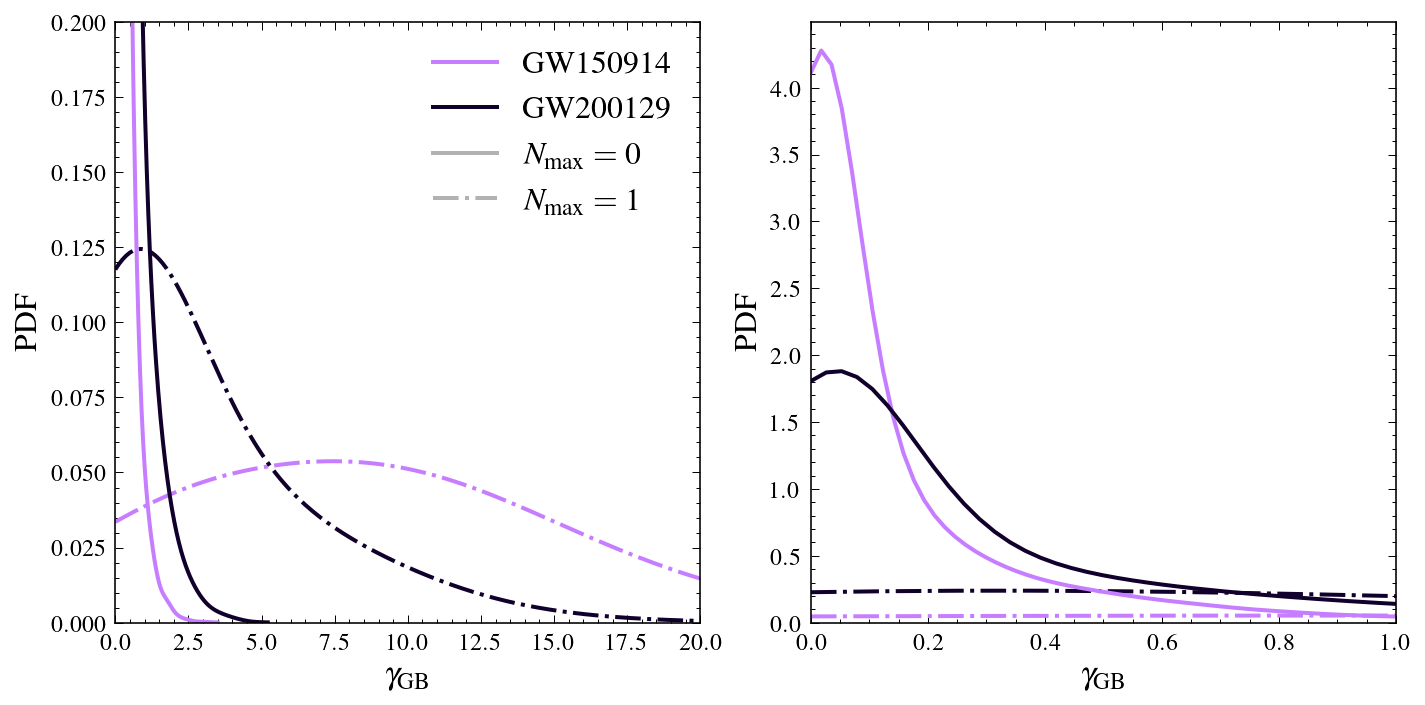

In [25]:
def gamma(l, mfs, pNGR):    
    return (l * 1.0e3 * lal.C_SI * lal.C_SI / lal.G_SI / mfs / lal.MSUN_SI)**pNGR

colorlist = ["#c77dff","#10002b"]
lslist = ["dashdot", "solid"]

fig, ax = plt.subplots(ncols=2,figsize=(10,5))

for idx, (ls, spinkey) in enumerate(zip(lslist, dataloc['EdGB'].keys())):
    for c, eventkey in zip(colorlist, dataloc['EdGB'][spinkey].keys()):
        print(spinkey, eventkey)
        data = np.genfromtxt(dataloc['EdGB'][spinkey][eventkey], names=True, dtype=None)
        mfs, l = data['mf_source_evol'], data['alphangr']
        
        sns.kdeplot(gamma(l, mfs, pNGR=4), ax=ax[0], color=c, ls=ls, lw=2, 
                    clip=[0, max(gamma(l, mfs, pNGR=4))], cut=0, bw_adjust=5)
        sns.kdeplot(gamma(l, mfs, pNGR=4), ax=ax[1], color=c, ls=ls, lw=2, 
                    clip=[0, max(gamma(l, mfs, pNGR=4))], cut=0, bw_adjust=2)

    ax[idx].set_xlabel("$\gamma_{\\rm GB}$", fontsize=16)
    ax[idx].set_ylabel("PDF", fontsize=16)
        
        
ax[0].plot(0, 0, color="#c77dff", lw=2, label="GW150914")        
ax[0].plot(0, 0, color="#10002b", lw=2, label="GW200129")

ax[0].plot(0, 0, color='k', ls="solid", lw=2, alpha=0.3, label="$N_{\\rm max}=0$")        
ax[0].plot(0, 0, color="k", ls="dashdot", lw=2, alpha=0.3, label="$N_{\\rm max}=1$")        
        
ax[0].set_xlim([0, 20])
ax[0].set_ylim([0, 0.2])
ax[1].set_xlim([0, 1.0])
ax[0].legend(loc="best", fontsize=16)


plt.tight_layout()
plt.savefig("../figs/edgb_gamma.pdf")